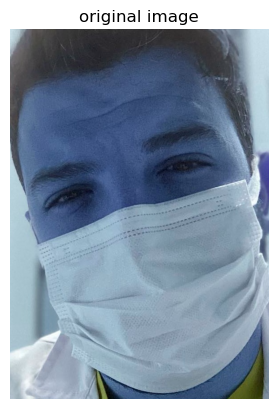

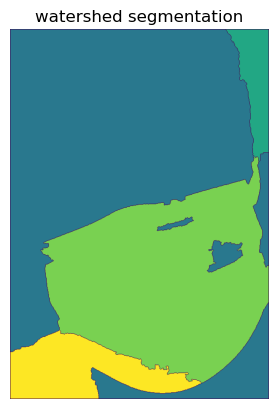

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# first let's get a feel for the data

# take a random image and see
img_name = '000040_1.jpg'
path_to_data = '../../proj_try/dataset2/1/face_crop/'
def watershed_segmentation(img_name, path_to_data, show=True):
    img = cv2.imread(path_to_data + img_name)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img = cv2.blur(gray_img, (5,5))
    
    if show:
        plt.axis('off')
        plt.title('original image')
        plt.imshow(img)
        plt.show()
        plt.close()

    ret, img_bin = cv2.threshold(gray_img,
                             0, 255, 
                             cv2.THRESH_OTSU)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img_bin = cv2.morphologyEx(img_bin, 
                            cv2.MORPH_OPEN,
                            kernel,
                            iterations=5)
        
    sure_bg = cv2.dilate(img_bin, kernel, iterations=3)

    dist = cv2.distanceTransform(img_bin, cv2.DIST_L2, 5)


    ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
    sure_fg = sure_fg.astype(np.uint8) 

    unknown = cv2.subtract(sure_bg, sure_fg)

    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that background is not 0, but 1
    markers += 1
    # mark the region of unknown with zero
    markers[unknown == 255] = 0

    # watershed Algorithm
    markers = cv2.watershed(img, markers)

    plt.axis('off')
    plt.title('watershed segmentation')
    plt.imshow(markers)
    plt.show()
    plt.close()

watershed_segmentation(img_name, path_to_data)

